In [16]:
# Modules 
import geopandas as gpd
import sys
import seaborn as sns
import matplotlib as plt

# Rasterio 
from rasterio.plot import show
import rasterio as rio
from rasterio.plot import show_hist


# Set consistency throught the notebook
sns.set_style("white")
sns.set(font_scale=1.5)

In [3]:
print(f"Python {sys.version}")
print(f"geopandas {gpd.__version__}")
# print(f"osgeo {gdal.__version__}")
print(f"rasterio {rio.__version__}")

Python 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
geopandas 0.14.3
rasterio 1.3.10


## 2.1 Read and Write Raster Data. 

In [ ]:
# Read data 
dem1=rio.open("F:/GIS DATA/Kenya Gis Data/DEMS 30m/s01_e035_1arc_v3.tif")



### DEM.

In [9]:
# DEM properties. 
print(f'Name : {dem.name} \n CRS : {dem.crs} \n Width : {dem.width} \n Height : {dem.height}  \n\
      Number of bands : {dem.count} Bounding box : {dem.bounds}')

Name : F:/GIS DATA/Kenya Gis Data/DEMS 30m/s01_e035_1arc_v3.tif 
 CRS : EPSG:4326 
 Width : 3601 
 Height : 3601  
      Number of bands : 1 Bounding box : BoundingBox(left=34.99986111111111, bottom=-1.000138888888889, right=36.000138888888884, top=0.0001388888888889106)


In [7]:
# DATA Properties in a single command
metadata = dem.meta

metadata

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32767.0,
 'width': 3601,
 'height': 3601,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0002777777777777778, 0.0, 34.99986111111111,
        0.0, -0.0002777777777777778, 0.0001388888888889106)}

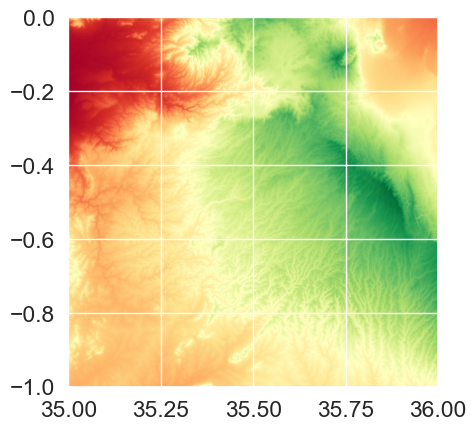

<Axes: >

In [15]:
# Plot data 

show(dem,cmap='RdYlGn')

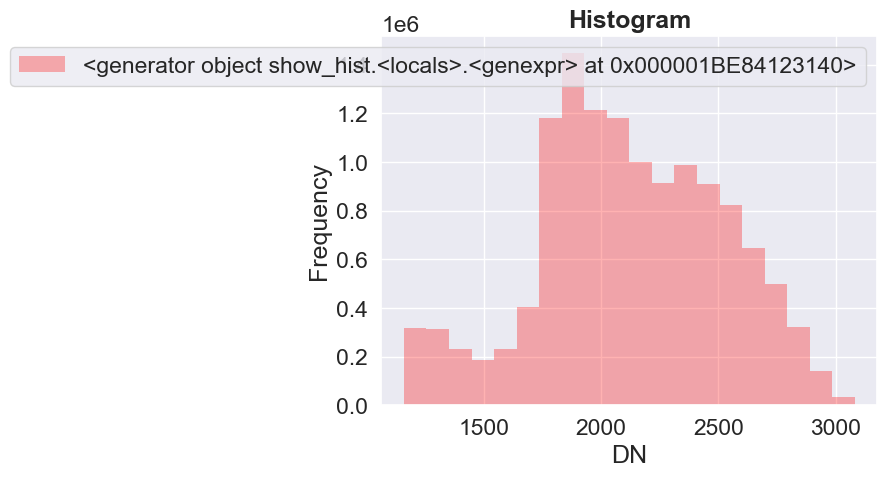

In [17]:
# Plot a histogram of pixel value distribution 

show_hist(dem, bins=20, lw=0.0, stacked=False, alpha=0.3,
        histtype='stepfilled', title="Histogram")

### Landsat Image.

In [28]:
# Landsat 8 bands path 
path = 'F:/Arc GIS/Training/Data/LC08_L2SP_168061_20240215_20240223_02_T1/LC08_L2SP_168061_20240215_20240223_02_T1_'

# Bands  
b1 = path + 'SR_B1.TIF' 
b2 = path + 'SR_B2.TIF'
b3 = path + 'SR_B3.TIF'
b4 = path + 'SR_B4.TIF'
b5 = path + 'SR_B5.TIF'
b6 = path + 'SR_B6.TIF'
b7 = path + 'SR_B7.TIF'

coastal=rio.open(b1)
red=rio.open(b2)
green=rio.open(b3)
blue=rio.open(b4)
nir=rio.open(b5)
swr1=rio.open(b6)
swr2=rio.open(b7)

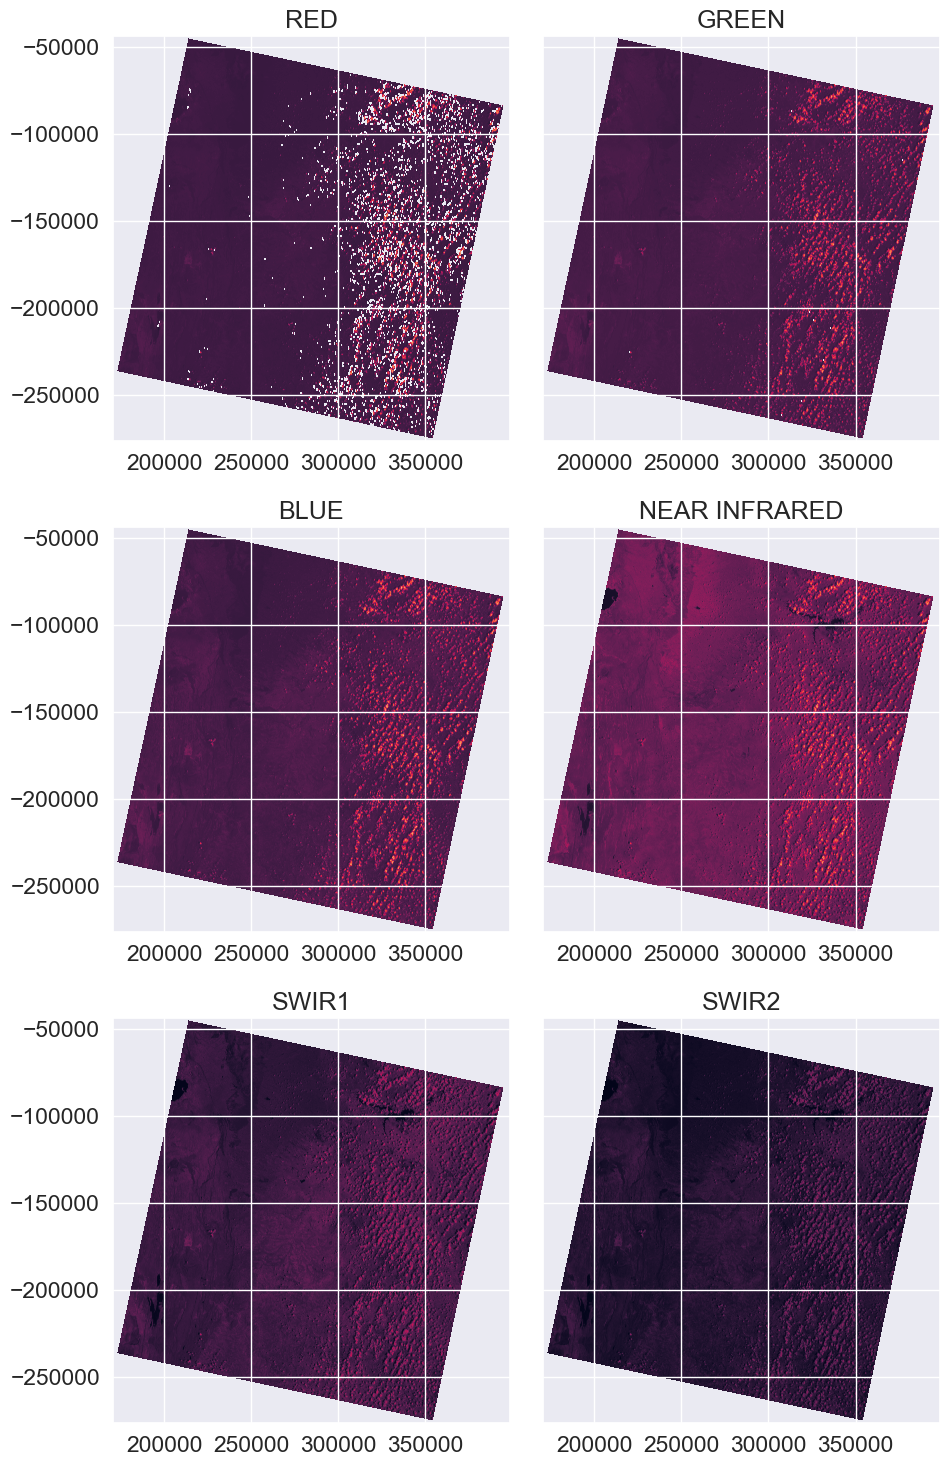

In [35]:
# Initialize subplots
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 15), sharey=True)

# Plot 4 bands
show(red, ax=axs[0, 0])
show(green, ax=axs[0, 1])
show(blue, ax=axs[1, 0])
show(nir, ax=axs[1, 1])
show(swr1, ax=axs[2, 0])
show(swr2, ax=axs[2, 1])

# Add titles
axs[0, 0].set_title("RED")
axs[0, 1].set_title("GREEN")
axs[1, 0].set_title("BLUE")
axs[1, 1].set_title("NEAR INFRARED")
axs[2, 0].set_title("SWIR1")
axs[2, 1].set_title("SWIR2")

# Adjust layout to prevent overlap
plt.tight_layout()

